In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#train_csv = 'train (1).csv'
houses = pd.read_csv('./train (1).csv')
houses_holdout_set = pd.read_csv('./test.csv')
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
empty_columns = houses.columns[houses.isnull().any()]
empty_columns_thing = houses[empty_columns].isnull().sum()

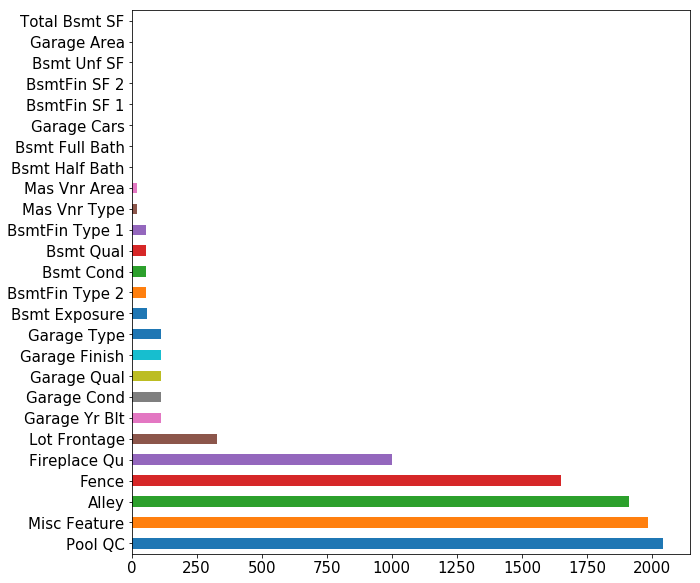

In [4]:
empty_columns_thing_sorted = empty_columns_thing.sort_values(ascending = False)
empty_columns_thing_sorted.plot.barh(y = '# of nulls', 
                                            figsize=(10, 10),
                                           fontsize = 15)

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
# I am going to use this to set all NaN values of Garage Yr Blt to Year Built 
# as the corr isn't too bad

houses['Year Built'].corr(houses['Garage Yr Blt'])

0.8253163760422902

In [7]:
houses.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
houses.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [9]:
houses_holdout_set.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      160
Lot Area            0
Street              0
Alley             821
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        1
Mas Vnr Area        1
Exter Qual          0
Exter Cond          0
                 ... 
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Cars         0
Garage Area         0
Garage Qua

In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

**I apologize for the below. I know there must be a better way to do this. However, this allowed me to visually see everything I was changing and to quickly adjust any parameters if needed.**

In [11]:
houses['Alley'].fillna('none', inplace = True)
houses['Mas Vnr Type'].fillna('none', inplace = True)
houses['Bsmt Qual'].fillna('none', inplace = True)
houses['Bsmt Cond'].fillna('none', inplace = True)
houses['Bsmt Exposure'].fillna('none', inplace = True)
houses['BsmtFin Type 1'].fillna('none', inplace = True)
houses['BsmtFin Type 2'].fillna('none', inplace = True)
houses['Garage Type'].fillna('none', inplace = True)
houses['Fireplace Qu'].fillna('none', inplace = True)
houses['Fireplace Qu'].fillna('none', inplace = True)
houses['Garage Finish'].fillna('none', inplace = True)
houses['Garage Qual'].fillna('none', inplace = True)
houses['Garage Cond'].fillna('none', inplace = True)
houses['Fence'].fillna('none', inplace = True)
houses['Misc Feature'].fillna('none', inplace = True)
houses['Pool QC'].fillna(0, inplace=True)

houses_holdout_set['Alley'].fillna('none', inplace = True)
houses_holdout_set['Mas Vnr Type'].fillna('none', inplace = True)
houses_holdout_set['Bsmt Qual'].fillna('none', inplace = True)
houses_holdout_set['Bsmt Cond'].fillna('none', inplace = True)
houses_holdout_set['Bsmt Exposure'].fillna('none', inplace = True)
houses_holdout_set['BsmtFin Type 1'].fillna('none', inplace = True)
houses_holdout_set['BsmtFin Type 2'].fillna('none', inplace = True)
houses_holdout_set['Garage Type'].fillna('none', inplace = True)
houses_holdout_set['Fireplace Qu'].fillna('none', inplace = True)
houses_holdout_set['Fireplace Qu'].fillna('none', inplace = True)
houses_holdout_set['Garage Finish'].fillna('none', inplace = True)
houses_holdout_set['Garage Qual'].fillna('none', inplace = True)
houses_holdout_set['Garage Cond'].fillna('none', inplace = True)
houses_holdout_set['Fence'].fillna('none', inplace = True)
houses_holdout_set['Misc Feature'].fillna('none', inplace = True)
houses_holdout_set['Pool QC'].fillna(0, inplace=True)

In [12]:
houses['Lot Frontage'].fillna(houses['Lot Frontage'].mean(), inplace = True)
houses['Mas Vnr Area'].fillna(houses['Mas Vnr Area'].mean(), inplace = True)
houses['BsmtFin SF 1'].fillna(houses['BsmtFin SF 1'].mean(), inplace = True)
houses['BsmtFin SF 2'].fillna(houses['BsmtFin SF 2'].mean(), inplace = True)
houses['Bsmt Unf SF'].fillna(houses['Bsmt Unf SF'].mean(), inplace = True)
houses['Total Bsmt SF'].fillna(houses['Total Bsmt SF'].mean(), inplace = True)
houses['Bsmt Full Bath'].fillna(houses['Bsmt Full Bath'].mean(), inplace = True)
houses['Bsmt Half Bath'].fillna(houses['Bsmt Half Bath'].mean(), inplace = True)
houses['Garage Yr Blt'].fillna(houses['Year Built'], inplace = True)
houses['Garage Cars'].fillna(0, inplace = True)
houses['Garage Area'].fillna(0, inplace = True)

houses_holdout_set['Lot Frontage'].fillna(houses_holdout_set['Lot Frontage'].mean(), inplace = True)
houses_holdout_set['Mas Vnr Area'].fillna(houses_holdout_set['Mas Vnr Area'].mean(), inplace = True)
houses_holdout_set['BsmtFin SF 1'].fillna(houses_holdout_set['BsmtFin SF 1'].mean(), inplace = True)
houses_holdout_set['BsmtFin SF 2'].fillna(houses_holdout_set['BsmtFin SF 2'].mean(), inplace = True)
houses_holdout_set['Bsmt Unf SF'].fillna(houses_holdout_set['Bsmt Unf SF'].mean(), inplace = True)
houses_holdout_set['Total Bsmt SF'].fillna(houses_holdout_set['Total Bsmt SF'].mean(), inplace = True)
houses_holdout_set['Bsmt Full Bath'].fillna(houses_holdout_set['Bsmt Full Bath'].mean(), inplace = True)
houses_holdout_set['Bsmt Half Bath'].fillna(houses_holdout_set['Bsmt Half Bath'].mean(), inplace = True)
houses_holdout_set['Garage Yr Blt'].fillna(houses_holdout_set['Year Built'], inplace = True)
houses_holdout_set['Garage Cars'].fillna(0, inplace = True)
houses_holdout_set['Garage Area'].fillna(0, inplace = True)

In [13]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2

In [14]:
houses_holdout_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       879 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof 

In [15]:
# to double check that I replaced all the null values

houses.loc[:, houses.isna().any()]

""
0
1
2
3
4
5
6
7
8
9


In [16]:
dumb_houses = pd.get_dummies(data=houses)
dumb_houses_holdout_set = pd.get_dummies(data = houses_holdout_set)

In [17]:
dumb_houses.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_none,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,1


**Here I am attempting to look at columns with a high correlation to feature engineer them.
Wish me luck.**

In [18]:
#dumb_houses['Year Remod/Add'].corr(dumb_houses['Overall Qual'])

In [19]:
dumb_houses_corr_test = dumb_houses.loc[:, dumb_houses.corr()['SalePrice'] > 0.6]

In [20]:
d_test = dumb_houses_corr_test.corr()

In [21]:
d_test.to_csv('./dumb_houses_corr_test.csv')

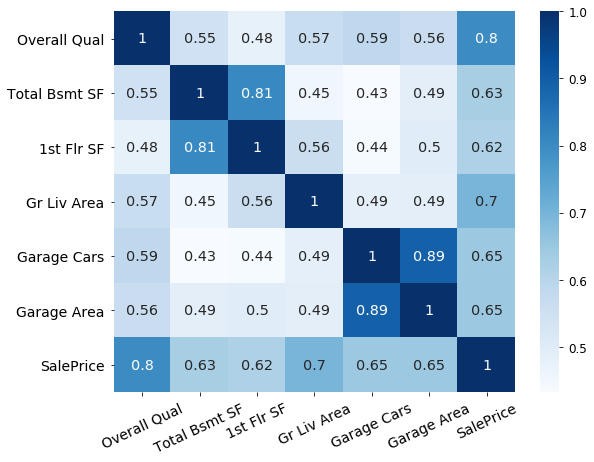

In [89]:
import seaborn as sns

fix, ax = plt.subplots(figsize=(9,7))

ax = sns.heatmap(d_test, ax=ax, annot=True, cmap="Blues")

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation = 25)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [23]:
#dumb_houses['Feature Engineer Test 1'] = dumb_houses['Overall Qual'] * dumb_houses['Total Bsmt SF'] * dumb_houses['1st Flr SF'] * dumb_houses['Gr Liv Area'] * dumb_houses['Garage Cars'] * dumb_houses['Garage Area']

#dumb_houses_holdout_set['Feature Engineer Test 1'] = dumb_houses_holdout_set['Overall Qual'] * dumb_houses_holdout_set['Total Bsmt SF'] * dumb_houses_holdout_set['1st Flr SF'] * dumb_houses_holdout_set['Gr Liv Area'] * dumb_houses_holdout_set['Garage Cars'] * dumb_houses_holdout_set['Garage Area']

#dumb_houses.head()

In [24]:
dumb_houses_holdout_set.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
nc = [x for x in dumb_houses.columns if x != 'SalePrice']


# for the record, I did not use PolynomialFeatures. 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
X = dumb_houses[nc]
y = dumb_houses['SalePrice']

In [26]:
# do we do this now or to the train data? this size doesn't match up

#X_poly = poly.fit_transform(X)

In [27]:
#X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(nc))

In [28]:
#X_poly_df.shape

In [29]:
X.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_none,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [31]:
r_sq_linreg = cross_val_score(linreg, X_train, y_train).mean()
r_sq_linreg

0.7971237557771533

In [32]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
linreg_score = linreg.score(X_test, y_test)
linreg_score

0.8983880352172011

**HERE I WILL SCALE MY X's**

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) # scaling so everything is between -1 and 1

X_test_scaled = ss.transform(X_test)

**RIDGE TEST**

In [35]:
from sklearn.linear_model import RidgeCV, Ridge
import numpy as np

ridgecv = RidgeCV(alphas = np.linspace(1.0, 300.5, num = 50))

print(ridgecv.fit(X_train_scaled, y_train))

ridgecv.alpha_ # this is my best Alpha score for Ridge

RidgeCV(alphas=array([  1.     ,   7.11224,  13.22449,  19.33673,  25.44898,  31.56122,
        37.67347,  43.78571,  49.89796,  56.0102 ,  62.12245,  68.23469,
        74.34694,  80.45918,  86.57143,  92.68367,  98.79592, 104.90816,
       111.02041, 117.13265, 123.2449 , 129.35714, 135.46939, 141.58163,
 ...     257.71429, 263.82653, 269.93878, 276.05102, 282.16327, 288.27551,
       294.38776, 300.5    ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)


300.5

In [36]:
# this tests my data against the ridge alpha

ridge_new = Ridge(ridgecv.alpha_)

r_sq_ridge = cross_val_score(ridge_new, X_train_scaled, y_train, cv=10).mean()
r_sq_ridge

0.833552955431899

In [37]:
# fitting the model

ridge_new.fit(X_train_scaled, y_train)

Ridge(alpha=300.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
# scoring the model

ridge_score = ridge_new.score(X_test_scaled, y_test)
ridge_score

0.8951051791546903



**LASSO TEST**



In [39]:
from sklearn.linear_model import LassoCV, Lasso

lassocv = LassoCV(eps = 0.001, n_alphas = 1000, cv = 20)

print(lassocv.fit(X_train_scaled, y_train))

lassocv.alpha_ # this is my best alpha for lasso

LassoCV(alphas=None, copy_X=True, cv=20, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=1000, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)


1018.0434130373318

In [40]:
# here is the mean value with the lasso alpha

lasso_model = Lasso(lassocv.alpha_)

r_sq_lasso = cross_val_score(lasso_model, X_train_scaled, y_train, cv = 20).mean()
r_sq_lasso

0.8497873879345132

In [41]:
# fitting the model 

lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1018.0434130373318, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
# scoring the model

lasso_score = lasso_model.score(X_test_scaled, y_test)
lasso_score

0.8982523755980887

**Here I will attempt the Elastic Net**

In [80]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

enetcv = ElasticNetCV(alphas = np.linspace(0.005, 20, num = 50), l1_ratio = [0.1, 0.5, 0.75, 0.8, 0.9], cv = 5) #why does this get worse when we let it chose it's own alphas
print(enetcv.fit(X_train_scaled, y_train))

enetcv.alpha_, enetcv.l1_ratio_

/Users/emmaeleanoryork/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/emmaeleanoryork/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/emmaeleanoryork/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/emmaeleanoryork/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: 

ElasticNetCV(alphas=array([5.00000e-03, 4.13061e-01, 8.21122e-01, 1.22918e+00, 1.63724e+00,
       2.04531e+00, 2.45337e+00, 2.86143e+00, 3.26949e+00, 3.67755e+00,
       4.08561e+00, 4.49367e+00, 4.90173e+00, 5.30980e+00, 5.71786e+00,
       6.12592e+00, 6.53398e+00, 6.94204e+00, 7.35010e+00, 7.75816e+00,
     ..., 1.75516e+01, 1.79597e+01,
       1.83678e+01, 1.87758e+01, 1.91839e+01, 1.95919e+01, 2.00000e+01]),
       copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.75, 0.8, 0.9], max_iter=1000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)


/Users/emmaeleanoryork/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(5.7178571428571425, 0.9)

In [81]:
enet_model = ElasticNet(alpha = enetcv.alpha_, l1_ratio = enetcv.l1_ratio_)

In [82]:
r_sq_enet = cross_val_score(enet_model, X_train_scaled, y_train, cv = 5).mean()
r_sq_enet

0.8580850100824415

In [83]:
# fitting the model

enet_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=5.7178571428571425, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [85]:
enet_score = enet_model.score(X_test_scaled, y_test)
enet_score

0.8819402651728089

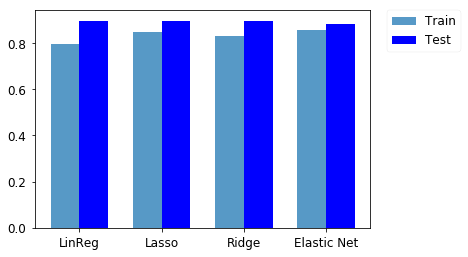

In [86]:
N = 4

r_sq_vals = (r_sq_linreg, r_sq_lasso, r_sq_ridge, r_sq_enet)
scores_vals = (linreg_score, lasso_score, ridge_score, enet_score)

ind = np.arange(N) 
width = 0.35

figsize = (10, 10)
fontsize = 500

plt.bar(ind, r_sq_vals, width, label = 'Train', alpha = .75)
plt.bar(ind + width, scores_vals, width, label = 'Test', color = 'blue')

#plt.ylabel('test')
#plt.title('R^2 vs Score')

plt.xticks(ind + width / 2, ('LinReg', 'Lasso', 'Ridge', 'Elastic Net'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [49]:
coef_df = pd.DataFrame({'Coef': enet_model.coef_,
            'Features': X_train.columns,
            'abs_coef': abs(enet_model.coef_)})

coef_df.sort_values('abs_coef', ascending = False)

,Coef,Features,abs_coef
17,6508.340827,Gr Liv Area,6508.340827
133,-6177.988542,Roof Matl_ClyTile,6177.988542
5,5921.060455,Overall Qual,5921.060455
291,-5082.030246,Misc Feature_Elev,5082.030246
14,4985.949942,1st Flr SF,4985.949942
189,4775.957314,Bsmt Qual_Ex,4775.957314
237,4669.841179,Kitchen Qual_Ex,4669.841179
174,4625.030208,Exter Qual_Ex,4625.030208
88,4261.488288,Neighborhood_NridgHt,4261.488288
13,4224.806861,Total Bsmt SF,4224.806861


In [50]:
coef_df_top = coef_df.sort_values('abs_coef', ascending = False).head(10)

In [51]:
coef_df_top

,Coef,Features,abs_coef
17,6508.340827,Gr Liv Area,6508.340827
133,-6177.988542,Roof Matl_ClyTile,6177.988542
5,5921.060455,Overall Qual,5921.060455
291,-5082.030246,Misc Feature_Elev,5082.030246
14,4985.949942,1st Flr SF,4985.949942
189,4775.957314,Bsmt Qual_Ex,4775.957314
237,4669.841179,Kitchen Qual_Ex,4669.841179
174,4625.030208,Exter Qual_Ex,4625.030208
88,4261.488288,Neighborhood_NridgHt,4261.488288
13,4224.806861,Total Bsmt SF,4224.806861


Text(0,0.5,'')

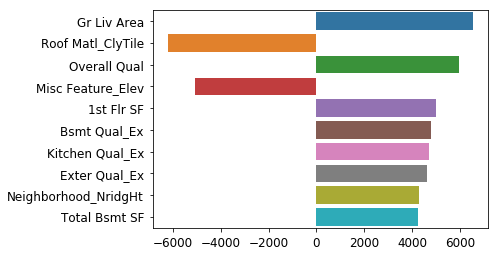

In [52]:
# this first line is to allow me to change the font size later.
# it took me longer than i care to admit to find out how to do this

sns.set_context("paper", font_scale=1.5)
ax = sns.barplot(x='Coef', y='Features', data=coef_df_top)

# these last two lines are to hid the labels so that it isn't too messy

ax.set_xlabel('')
ax.set_ylabel('')

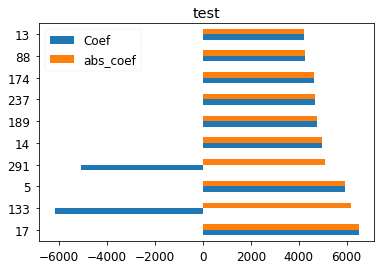

In [53]:
coef_df_top.plot.barh(title = 'test')

**Now I am going to make sure my data frame matches the test data frame**

In [54]:
dumb_houses_holdout_set.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# this first line sets up the features for the test csv dataframe

nc_hold = [x for x in dumb_houses_holdout_set.columns if x != 'SalePrice']

X_holdout = dumb_houses_holdout_set[nc_hold]
X_holdout.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# i know that my columns don't match up for my X_train and X_holdout set, so i will fix that below

to_add = set(X_train.columns) - set(X_holdout.columns)
to_add_list = list(to_add)

In [57]:
type(to_add_list)

list

In [58]:
# here i add the columns that were missing from the X_holdout to the holdout set

X_holdout_rev = pd.concat([X_holdout,pd.DataFrame(columns=to_add_list)])

/Users/emmaeleanoryork/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# checking to make sure it worked

X_holdout_rev.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley_Grvl,Alley_Pave,Alley_none,Bedroom AbvGr,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,...,Street_Pave,TotRms AbvGrd,Total Bsmt SF,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908.0,1020.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,...,1.0,9.0,1020.0,1.0,NaN,0.0,0.0,1910.0,1950.0,2006.0
1,1967.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,...,1.0,10.0,1967.0,1.0,NaN,0.0,170.0,1977.0,1977.0,2006.0
2,664.0,832.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,...,1.0,7.0,654.0,1.0,NaN,0.0,100.0,2006.0,2006.0,2006.0
3,968.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,1.0,5.0,968.0,1.0,NaN,0.0,0.0,1923.0,2006.0,2007.0
4,1394.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,...,1.0,6.0,1394.0,1.0,NaN,0.0,0.0,1963.0,1963.0,2009.0


In [60]:
# checking the column count, looks like i have some more work to do!

X_train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_none,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
753,965,916403250,80,125.0000,14419,7,5,1987,1989,310.0,...,1,0,0,0,0,0,0,0,0,1
795,355,527162110,60,74.0000,10141,7,5,1998,1998,40.0,...,1,0,0,0,0,0,0,0,0,1
197,2835,908227010,50,72.0000,7822,6,3,1915,1950,0.0,...,1,0,0,0,0,0,0,0,0,1
1316,1006,527163100,60,69.0552,8000,6,5,1995,1996,0.0,...,1,0,0,0,0,0,0,0,0,1
1499,769,905101260,80,70.0000,12886,5,6,1963,1999,0.0,...,1,0,0,0,0,0,0,0,0,1


In [61]:
to_subtract = set(X_holdout_rev.columns) - set(X_train.columns)
to_subtract_list = list(to_subtract)

In [62]:
X_holdout_rev.drop(to_subtract_list, axis = 1, inplace = True)

In [63]:
X_holdout_rev.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley_Grvl,Alley_Pave,Alley_none,Bedroom AbvGr,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,...,Street_Pave,TotRms AbvGrd,Total Bsmt SF,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908.0,1020.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,...,1.0,9.0,1020.0,1.0,NaN,0.0,0.0,1910.0,1950.0,2006.0
1,1967.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,...,1.0,10.0,1967.0,1.0,NaN,0.0,170.0,1977.0,1977.0,2006.0
2,664.0,832.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,...,1.0,7.0,654.0,1.0,NaN,0.0,100.0,2006.0,2006.0,2006.0
3,968.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,1.0,5.0,968.0,1.0,NaN,0.0,0.0,1923.0,2006.0,2007.0
4,1394.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,...,1.0,6.0,1394.0,1.0,NaN,0.0,0.0,1963.0,1963.0,2009.0


In [64]:
X_train.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_none,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
753,965,916403250,80,125.0000,14419,7,5,1987,1989,310.0,...,1,0,0,0,0,0,0,0,0,1
795,355,527162110,60,74.0000,10141,7,5,1998,1998,40.0,...,1,0,0,0,0,0,0,0,0,1
197,2835,908227010,50,72.0000,7822,6,3,1915,1950,0.0,...,1,0,0,0,0,0,0,0,0,1
1316,1006,527163100,60,69.0552,8000,6,5,1995,1996,0.0,...,1,0,0,0,0,0,0,0,0,1
1499,769,905101260,80,70.0000,12886,5,6,1963,1999,0.0,...,1,0,0,0,0,0,0,0,0,1


**Now I will get rid of all the NaN values!**

In [65]:
# to get rid of all NaN values

X_holdout_rev.fillna(0, inplace = True)

In [66]:
# This syncs up the columns so that they are comparing apples to apples

X_holdout_rev = X_holdout_rev[X_train.columns]

In [67]:
X_holdout_rev.to_csv('./X_holdout_rev.csv')
X_train.to_csv('./X_train.csv')

In [68]:
# making sure there aren't any extra columns

set(X_holdout_rev.columns) - set(X_train.columns)

set()

In [69]:
set(X_train.columns) - set(X_holdout_rev.columns)

set()

In [70]:
# here I am scaling the X_holdout_rev data so that I can use Lasso on it

X_holdout_rev_scaled = ss.transform(X_holdout_rev)

In [71]:
y_preds_linreg = linreg.predict(X_holdout_rev)

In [72]:
y_preds_lasso = lasso_model.predict(X_holdout_rev_scaled)

In [73]:
y_preds_enet = enet_model.predict(X_holdout_rev_scaled)

In [74]:
y_preds_ridge = ridge_new.predict(X_holdout_rev_scaled)

In [75]:
my_ids = dumb_houses_holdout_set['Id']

df = pd.DataFrame()

df['Id'] = my_ids

df.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [76]:
df['SalePrice'] = y_preds_enet

In [77]:
df.head()

,Id,SalePrice
0,2658,105621.283390
1,2718,164202.970918
2,2414,225227.545725
3,1989,104814.825728
4,625,178567.873122


In [78]:
df.set_index('Id', inplace = True)

In [79]:
df.to_csv('./my_preds_final_2.csv')